# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

In [88]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:


#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [56]:
url = 'https://github.com/trending/developers'

html_doc = requests.get(url)
html_doc = html_doc.content
soup = BeautifulSoup(html_doc, 'html.parser')



mydivs = soup.find_all("div", {"class": "col-md-6"})

lst = []

for i,curr_div in enumerate(mydivs) :
    if i % 2 == 0 :
      name = ""
      for j,curr_a in enumerate(curr_div.findAll("a")) :
        if j == 0 : 
          name = curr_a.text.strip(" \n")
        if j == 1 :
           name = name + " (" + curr_a.text.strip(" \n") + ")"
      lst.append(name)

#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [57]:
url = 'https://github.com/trending/python?since=daily'

html_doc = requests.get(url)
html_doc = html_doc.content

soup = BeautifulSoup(html_doc, 'html.parser')

mydivs = soup.find_all("h2", {"class": "h3 lh-condensed"})

lst = []

for i,curr_div in enumerate(mydivs) :
    lst.append(re.search("(?<=/)[^\]]+",curr_div.text)[0].strip(" \n"))

#### Display all the image links from Walt Disney wikipedia page.

In [92]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

html_doc = requests.get(url)
html_doc = html_doc.content

soup = BeautifulSoup(html_doc, 'html.parser')
imgs = soup.find_all("img")

for img in imgs :
    if img["src"][:7] == "/static" :
        url = "https://en.wikipedia.org" + img["src"]
    else :
        url = "https:"+img["src"]
    
    try : 
        response = requests.get(url)
        display = Image.open(BytesIO(response.content))
        display.show()

    except :
        print(url)

https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-en.svg
https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-en.svg


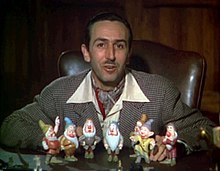

In [85]:
import requests
from PIL import Image
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg/220px-Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [ ]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [ ]:
# your code here

#### Find the number of titles that have changed in the United States Code since its last release point.

In [ ]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [ ]:
# your code here

#### Find a Python list with the top ten FBI's Most Wanted names.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

In [ ]:
# your code here

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
# your code here

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [ ]:
# your code here

#### A list with the different kind of datasets available in data.gov.uk.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
# your code here

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
# your code here

## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here